In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='..'
dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=4.24s)
creating index...
index created!


In [18]:
cats = coco.loadCats(coco.getCatIds())
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

In [19]:
# display COCO categories and supercategories
#cats = coco.loadCats(coco.getCatIds())
names=[cat['name'] for cat in cats]
print('COCO categories names: \n{}\n'.format(' '.join(names)))

names = set([cat['supercategory'] for cat in cats])
print('COCO supercategories names: \n{}'.format(' '.join(names)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
food sports outdoor appliance kitchen furniture indoor vehicle accessory electronic person animal


In [37]:
# get all images containing given categories, select one at random
#catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
catIds = coco.getCatIds(catNms=['person','car','stop sign']);
catIds

[1, 3, 13]

In [46]:
imgIds = coco.getImgIds(catIds=catIds );
#imgIds = coco.getImgIds(imgIds = [324158])
imgIds

[237568,
 184324,
 440329,
 44045,
 424975,
 407570,
 46099,
 381971,
 183833,
 399905,
 408610,
 361506,
 231460,
 347172,
 270376,
 316968,
 514097,
 241717,
 549943,
 14392,
 540733,
 363581,
 334405,
 430155,
 156747,
 332877,
 290896,
 415828,
 213593,
 99425,
 443492,
 277094,
 150639,
 578675,
 127092,
 153207,
 454776,
 333436,
 207491,
 328836,
 175244,
 341645,
 295055,
 478868,
 375450,
 460962,
 451234,
 487076,
 368302,
 334006,
 66239,
 299207,
 359626,
 192716,
 16076,
 391392,
 151267,
 475882,
 453870,
 233711,
 433904,
 106739,
 578292,
 69366,
 525050,
 147195,
 4355,
 258311,
 59660,
 27917,
 493846,
 24343,
 481563,
 326428,
 369442,
 151334,
 106794,
 180013,
 130352,
 142129,
 27441,
 15157,
 543547,
 397628,
 134459,
 580418,
 151877,
 330053,
 559950,
 567644,
 459103,
 82787,
 544611,
 179563,
 460652,
 319345,
 458613,
 433014,
 249720,
 495993,
 77689,
 83844,
 278934,
 199578,
 105885,
 215456,
 358817,
 182176,
 20904,
 281512,
 274864,
 327089,
 81336,
 1

In [41]:
imgIds_=imgIds[np.random.randint(0,len(imgIds))]
imgIds_

175244

In [99]:
#img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
# random pick
#img = coco.loadImgs(imgIds_)[0]
img = coco.loadImgs(imgIds[3])[0] # Same to below
#img = coco.loadImgs(imgIds)[3]
img

{'license': 3,
 'file_name': 'COCO_val2014_000000044045.jpg',
 'coco_url': 'http://mscoco.org/images/44045',
 'height': 640,
 'width': 480,
 'date_captured': '2013-11-17 09:15:50',
 'flickr_url': 'http://farm5.staticflickr.com/4100/4813905261_5d3c35093c_z.jpg',
 'id': 44045}

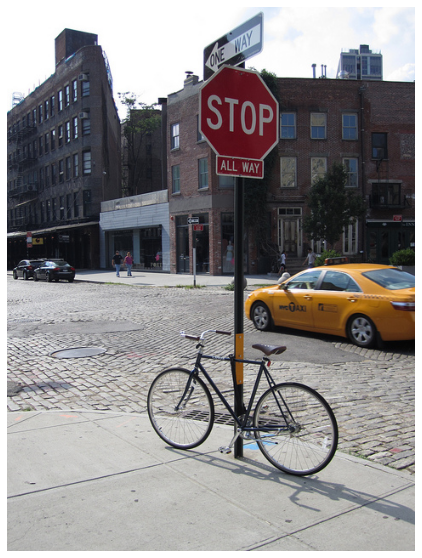

In [100]:
# load and display image
I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
#I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [101]:
# load and display instance annotations
catIds_ = coco.getCatIds(catNms=['car','stop sign']);
#annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds_, iscrowd=None)
#annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
annIds

[134320, 141221, 145515, 269670]

In [102]:
anns = coco.loadAnns(annIds)
anns

[{'segmentation': [[476.89,
    393.61,
    450.63,
    397.75,
    436.8,
    394.99,
    400.86,
    393.61,
    308.25,
    375.64,
    290.28,
    375.64,
    281.99,
    353.52,
    297.19,
    331.4,
    316.54,
    325.87,
    353.87,
    300.99,
    456.16,
    298.23,
    480.0,
    312.05]],
  'area': 15347.071799999998,
  'iscrowd': 0,
  'image_id': 44045,
  'bbox': [281.99, 298.23, 198.01, 99.52],
  'category_id': 3,
  'id': 134320},
 {'segmentation': [[32.72,
    310.2,
    29.57,
    315.59,
    33.17,
    322.77,
    36.76,
    321.42,
    44.84,
    321.87,
    49.32,
    324.12,
    53.36,
    322.32,
    76.25,
    321.42,
    78.95,
    321.87,
    79.4,
    307.96,
    67.28,
    297.19,
    45.73,
    295.39,
    37.2,
    303.92,
    32.27,
    311.55]],
  'area': 1063.6699000000006,
  'iscrowd': 0,
  'image_id': 44045,
  'bbox': [29.57, 295.39, 49.83, 28.73],
  'category_id': 3,
  'id': 141221},
 {'segmentation': [[32.23,
    310.33,
    29.71,
    314.1,
    30.

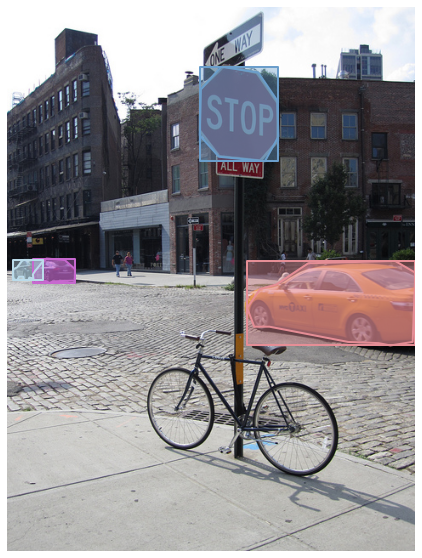

In [106]:
plt.imshow(I); plt.axis('off')
#coco.showAnns(anns)
coco.showAnns(anns, draw_bbox=True)

In [107]:
## The end ##

In [ ]:
# there are no keypoint, caption annotation currently

In [91]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../annotations/person_keypoints_val2014.json'

NameError: name 'coco_kps' is not defined

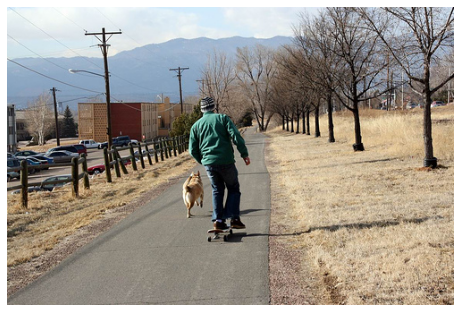

In [10]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [11]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...


FileNotFoundError: [Errno 2] No such file or directory: '../annotations/captions_val2014.json'

In [12]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

NameError: name 'coco_caps' is not defined